# Actividad - Escalamiento de la incertidumbre en el movimiento browniano

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parametros de simulacion
np.random.seed(42)
num_sims = 5000
num_steps = 252
horizons = [0.25, 0.5, 1.0, 2.0]

final_values = {}
for T in horizons:
    dt = T / num_steps
    increments = np.random.normal(loc=0.0, scale=np.sqrt(dt), size=(num_sims, num_steps))
    paths = increments.cumsum(axis=1)
    final_values[T] = paths[:, -1]

final_values

{0.25: array([-0.02988275,  0.200565  , -0.60941967, ...,  0.02796284,
        -0.44720135,  0.05792966]),
 0.5: array([-0.54691492, -0.52081867,  0.78074647, ..., -0.34729964,
         0.40528971, -0.77638195]),
 1.0: array([ 0.7793125 , -0.99723113,  1.41231362, ...,  0.80709893,
         0.39526652,  1.81815887]),
 2.0: array([-0.14536603, -0.86504211,  0.84818993, ..., -0.58899646,
        -1.08066065, -0.92902277])}

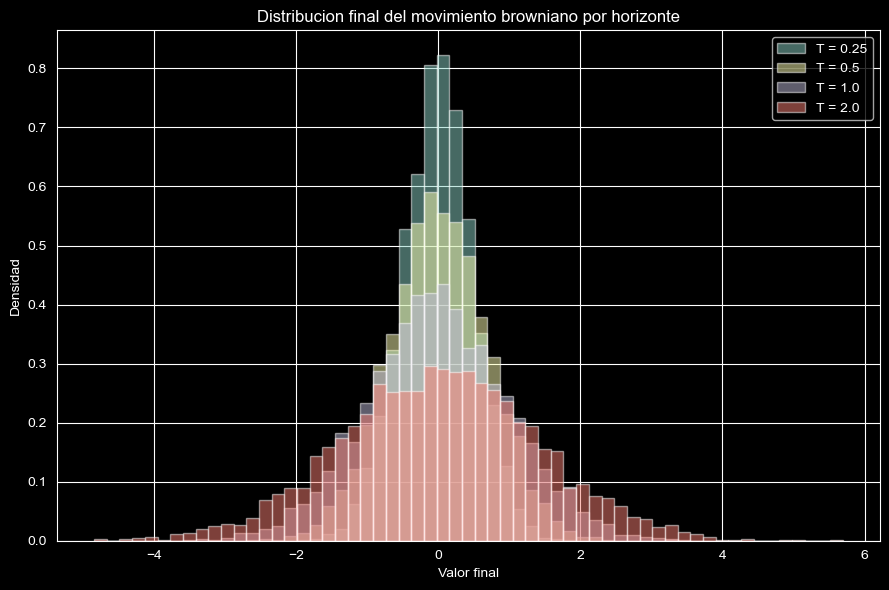

In [2]:
# Visualizacion de distribuciones finales
all_values = np.concatenate(list(final_values.values()))
bins = np.linspace(all_values.min(), all_values.max(), 60)

plt.figure(figsize=(9, 6))
for T, values in final_values.items():
    plt.hist(values, bins=bins, alpha=0.5, density=True, label=f"T = {T}")

plt.title("Distribucion final del movimiento browniano por horizonte")
plt.xlabel("Valor final")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
# Estadisticas empiricas por horizonte
rows = []
for T, values in final_values.items():
    rows.append({
        "T": T,
        "Media": np.mean(values),
        "Varianza": np.var(values, ddof=1),
        "Desv_Estandar": np.std(values, ddof=1),
    })

stats_df = pd.DataFrame(rows).sort_values("T").reset_index(drop=True)
stats_df

,T,Media,Varianza,Desv_Estandar
0,0.25,-0.011373,0.247858,0.497854
1,0.50,0.005711,0.486495,0.697492
2,1.00,-0.006346,0.991937,0.995960
3,2.00,0.017844,1.926787,1.388088


## Parte 4 - Preguntas de analisis

1. La dispersion aumenta conforme crece el horizonte temporal, las distribuciones se ensanchan.
2. No, la media se mantiene cercana a cero y no depende del tiempo.
3. La varianza crece aproximadamente de forma proporcional al tiempo $(Var[B_T] = T)$.
4. Si T se cuadruplica, la desviacion estandar aproximadamente se duplica (porque escala con sqrt(T)).
5. A mayor horizonte temporal, mayor incertidumbre y riesgo; el rango de posibles resultados se expande y la exposicion al riesgo aumenta.
